# Импорт модулей

In [2]:
import pandas as pd
import jsonlines
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords

# Пункт 1
1.1. считайте данные из файла и превратите их в датафрейм со столбцами lemma, word и pos (2 балла),

In [3]:
my_data = []
with jsonlines.open('info.jsonl') as reader:
    for line in reader.iter():
        my_data.append(line)
df = pd.DataFrame(my_data)
df.head()

,lemma,word,pos
0,мум,муму,NOUN
1,в,в,PREP
2,один,одной,ADJF
3,из,из,PREP
4,отдалённый,отдалённых,ADJF


1.2. создайте дополнительный столбец более общих частей речи: 

In [4]:
def new_pos(text):
    if text in ['ADJF', 'ADJS']:
        return 'ADJ'
    elif text in ["GRND", "PRTF", "PRTS", "INFN", "VERB"]:
        return "VERB"
    else:
        return text
df["pos_two"] = df["pos"].apply(new_pos)
df.head()

,lemma,word,pos,pos_two
0,мум,муму,NOUN,NOUN
1,в,в,PREP,PREP
2,один,одной,ADJF,ADJ
3,из,из,PREP,PREP
4,отдалённый,отдалённых,ADJF,ADJ


1.3. создайте дополнительный столбец омоформы

In [5]:
df['omo'] = np.where((df['word'] == df['lemma'])
                     , True, False)
df.tail()

,lemma,word,pos,pos_two,omo
10663,о,о,PREP,PREP,True
10664,богатырский,богатырской,ADJF,ADJ,False
10665,сила,силе,NOUN,NOUN,False
10666,немой,немого,ADJF,ADJ,False
10667,.,.,None,None,True


# Пункт 2
2.1. столбчатую диаграмму / bar chart (подумайте, к какому столбцу она применима)

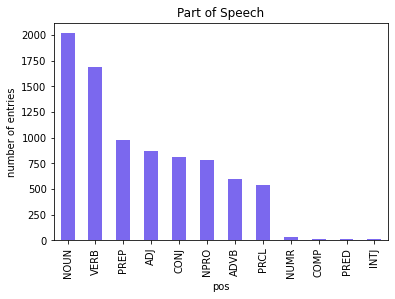

In [27]:
df['pos_two'].value_counts().plot.bar(color='mediumslateblue');
plt.title('Part of Speech')
plt.xlabel('pos')
plt.ylabel('number of entries');

2.3. круговую диаграмму / pie chart по количеству омоформ,

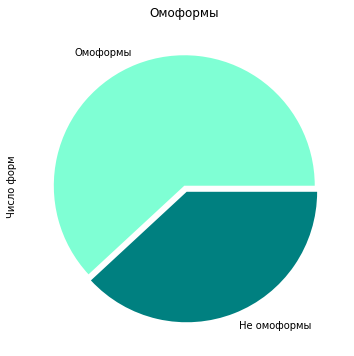

In [25]:
plt.figure(figsize=(6, 6))
df['omo'].value_counts().plot(explode = (0, 0.05),
                              kind='pie',
                             colors = ['aquamarine', 'teal'],
                             labels = ['Омоформы', 'Не омоформы'],);
plt.title('Омоформы')
plt.ylabel('Число форм');

2.3. облако слов / wordcloud лемм.

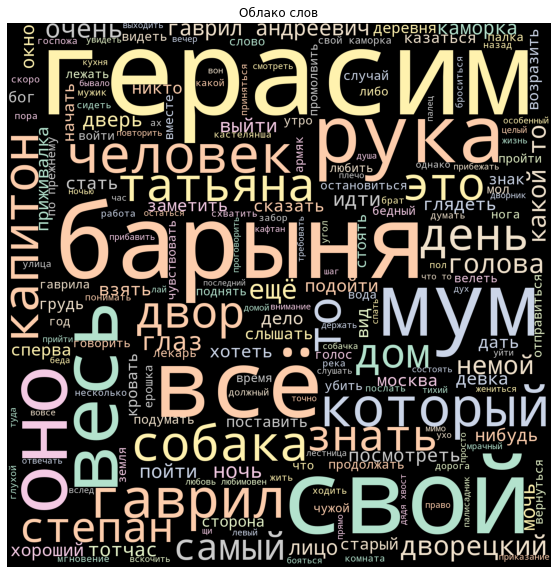

In [8]:
stops = set(stopwords.words('russian'))
text = ' '.join([word for word in df['lemma'].values if word not in stops])
wordcloud = WordCloud(
    background_color ='black',
    colormap = 'Pastel2',
    width = 1500,
    height = 1500, 
).generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

новый столбец, в котором посчитана средняя длина слова

In [9]:
def length(text):
    return len(text)
df["len_word"] = df["word"].apply(length)
df.head()

,lemma,word,pos,pos_two,omo,len_word
0,мум,муму,NOUN,NOUN,False,4
1,в,в,PREP,PREP,True,1
2,один,одной,ADJF,ADJ,False,5
3,из,из,PREP,PREP,True,2
4,отдалённый,отдалённых,ADJF,ADJ,False,10


новая таблица, в которой посчитаны среднее, медианное, минимальное и максимальное значение длины слова для части речи

In [10]:
new_df = df.groupby("pos_two").agg({'len_word': ['mean', 'median', 'min', 'max']})
new_df.head(20)

len_word               
             mean median min max
pos_two                         
ADJ      6.611239      6   2  17
ADVB     6.128548      6   1  16
COMP     6.222222      6   4   9
CONJ     2.223039      1   1  10
INTJ     3.000000      2   2   8
NOUN     6.335647      6   1  16
NPRO     2.840967      3   1  11
NUMR     5.000000      4   3  12
PRCL     2.623134      2   1  10
PRED     5.111111      5   3   8
PREP     1.859918      2   1   9
VERB     7.401304      7   1  17

Столбцы отражают среднюю длину слова; линии -- медианную, минимальную и максимальную.

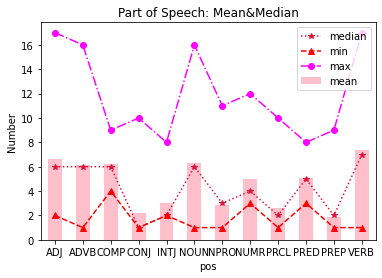

In [12]:
new_df['len_word']['mean'].plot.bar(color='pink');
new_df['len_word']['median'].plot(color='crimson', linestyle = ':', marker = '*');
new_df['len_word']['min'].plot(color='red', linestyle = '--', marker = '^');
new_df['len_word']['max'].plot(color='magenta', linestyle = '-.', marker = 'o');
plt.title('Part of Speech: Mean&Median')
plt.xlabel('pos')
plt.ylabel('Number');
plt.legend()

boxplot («ящик с усами») длины слов, сгруппированных по части речи

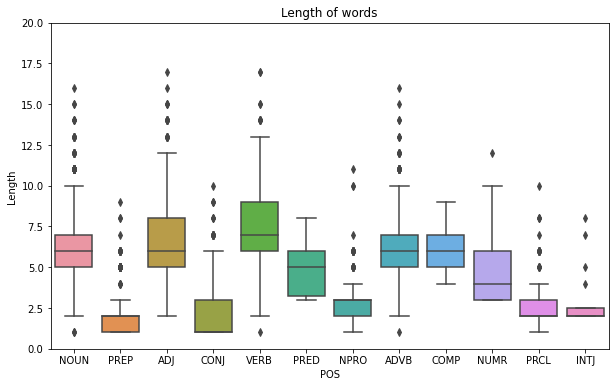

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pos_two", y="len_word", data=df)
plt.ylim((0, 20))
plt.title('Length of words')
plt.ylabel('Length')
plt.xlabel('POS');